Лабораторная работа 5.5.1.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [46]:
# Данные
l_alumn = np.array([2, 4.1, 5.9, 8, 10.1, 12, 14.1, 16])
N0 = 2298
N_background = 35
y_alumn = np.array([46147, 30621, 20404, 13768, 9246, 6263, 4268, 2928])
ln_n_n0_alumn = np.log((y_alumn - N_background) / N0)

l_lead = np.array([0.5, 1, 1.6, 2, 2.4, 3, 3.5, 4])
y_lead = np.array([39065, 22271, 12761, 7384, 4527, 2755, 1821, 1156])
ln_n_n0_lead = np.log((y_lead - N_background) / N0)

l_iron = np.array([1, 2.1, 3, 4.1, 5, 6, 6.9, 8])
y_iron = np.array([39422, 22614, 13034, 7333, 4305, 2589, 1576, 1085])
ln_n_n0_iron = np.log((y_iron - N_background) / N0)

In [47]:
# Линейная аппроксимация всех материалов
# Алюминий
coeff_alumn = np.polyfit(l_alumn, ln_n_n0_alumn, 1)
slope_alumn, intercept_alumn = coeff_alumn

# Свинец
coeff_lead = np.polyfit(l_lead, ln_n_n0_lead, 1)
slope_lead, intercept_lead = coeff_lead

# Железо
coeff_iron = np.polyfit(l_iron, ln_n_n0_iron, 1)
slope_iron, intercept_iron = coeff_iron

Алюминий: R² = 0.9997
Свинец: R² = 0.9953
Железо: R² = 0.9972


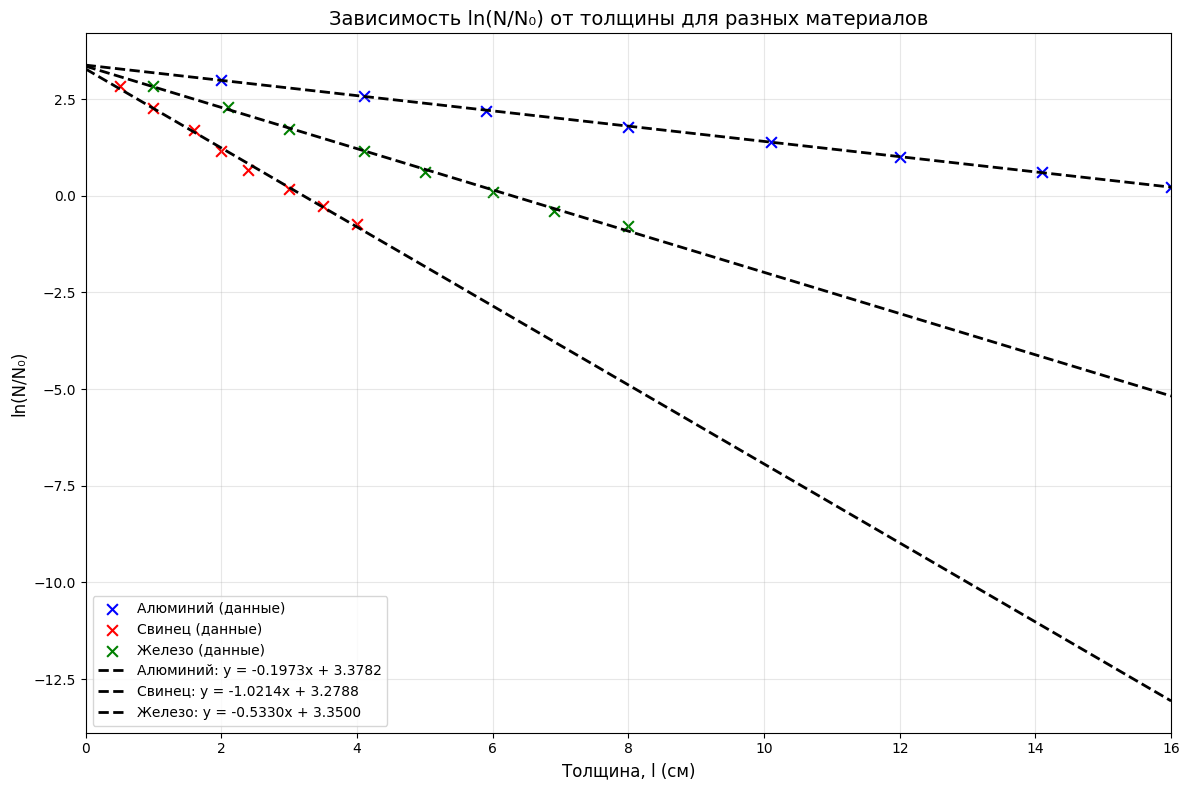

In [48]:
l_fit = np.linspace(0, 16, 100)
ln_n_n0_alumn_fit = slope_alumn * l_fit + intercept_alumn
ln_n_n0_lead_fit = slope_lead * l_fit + intercept_lead
ln_n_n0_iron_fit = slope_iron * l_fit + intercept_iron

plt.figure(figsize=(12, 8))

# Точечные данные
plt.scatter(l_alumn, ln_n_n0_alumn, color='blue', label='Алюминий (данные)', marker='x', s=60)
plt.scatter(l_lead, ln_n_n0_lead, color='red', label='Свинец (данные)', marker='x',s=60)
plt.scatter(l_iron, ln_n_n0_iron, color='green', label='Железо (данные)', marker='x',s=60)

plt.plot(l_fit, ln_n_n0_alumn_fit, color='black', linestyle='--', 
         label=f'Алюминий: y = {slope_alumn:.4f}x + {intercept_alumn:.4f}', linewidth=2)
plt.plot(l_fit, ln_n_n0_lead_fit, color='black', linestyle='--', 
         label=f'Свинец: y = {slope_lead:.4f}x + {intercept_lead:.4f}', linewidth=2)
plt.plot(l_fit, ln_n_n0_iron_fit, color='black', linestyle='--', 
         label=f'Железо: y = {slope_iron:.4f}x + {intercept_iron:.4f}', linewidth=2)

plt.xlabel('Толщина, l (см)', fontsize=12)
plt.ylabel('ln(N/N₀)', fontsize=12)
plt.title('Зависимость ln(N/N₀) от толщины для разных материалов', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, 16)

# Вычисление R² для всех материалов
def calculate_r_squared(l, ln_n_n0, slope, intercept):
    y_pred = slope * l + intercept
    ss_res = np.sum((ln_n_n0 - y_pred) ** 2)
    ss_tot = np.sum((ln_n_n0 - np.mean(ln_n_n0)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_alumn = calculate_r_squared(l_alumn, ln_n_n0_alumn, slope_alumn, intercept_alumn)
r2_lead = calculate_r_squared(l_lead, ln_n_n0_lead, slope_lead, intercept_lead)
r2_iron = calculate_r_squared(l_iron, ln_n_n0_iron, slope_iron, intercept_iron)

print(f"Алюминий: R² = {round(r2_alumn, 4)}")
print(f"Свинец: R² = {round(r2_lead, 4)}")
print(f"Железо: R² = {round(r2_iron, 4)}")

plt.tight_layout()
plt.show()